**Hello World Example**

_This notebook is heavily based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "feedforward"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from http://mldata.org. 

In [28]:
from sklearn.datasets import fetch_mldata
import math

mnist = fetch_mldata('MNIST original')

# Use the notion of y=f(X)
X, y = mnist["data"], mnist["target"]

print(X)
print(y)
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 9. 9. 9.]
Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


We can use the matplotlib library to plot the image as a grayscale image with pyplot. Let's find images labeled 7.   

[41935 41936 41937 ... 68014 68015 68016]
There are 7293 images that are labeled 7
Saving figure digit_7_plot


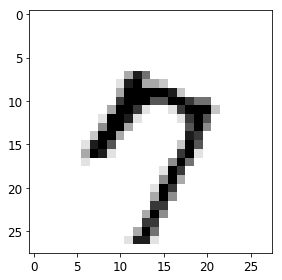

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(y==7)[0]
print('There are {0} images that are labeled 7'.format(index7.shape[0]))

# randomly pick an image
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
# print to file
save_fig("digit_7_plot")
plt.show()

Function by Aurelien Geron to plot sample images in a matrix. Note that the indicies are hard-coded meaning that he is relying on the ordering of the dataset.

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Test and Training Data

Split data into test and training data after re-shuffling the data. We can simply take the first 60000 as training and the last 10000 as test.

In [6]:
shuffle_index = np.random.permutation(70000)
# reshuffle the data and use 60000 samples as training and 10000 as test
X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


# Binary classifier

Set up a binary classifier for 7 and not 7. We create new labels which are true meaning we have a 7 and false meaning we do not have a 7. 

In [7]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)
print('We have a training set with {0} images of 7, and a test set with {1}'.format(sum(y_train_7),sum(y_test_7)))


We have a training set with 6251 images of 7, and a test set with 1042


Could compare with logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

bin_clf = LogisticRegression(max_iter=5)
bin_clf.fit(X_train, y_train_7)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(max_iter=100,solver='sgd',verbose='true',validation_fraction=0.0)

nn_clf.fit(X_train, y_train_7)

Iteration 1, loss = 0.18571179
Iteration 2, loss = 0.04991876
Iteration 3, loss = 0.03698895
Iteration 4, loss = 0.03239144
Iteration 5, loss = 0.02889570
Iteration 6, loss = 0.02518198
Iteration 7, loss = 0.02290007
Iteration 8, loss = 0.02053848
Iteration 9, loss = 0.01816329
Iteration 10, loss = 0.01710664
Iteration 11, loss = 0.01546856
Iteration 12, loss = 0.01412878
Iteration 13, loss = 0.01266422
Iteration 14, loss = 0.01141959
Iteration 15, loss = 0.01096895
Iteration 16, loss = 0.00965433
Iteration 17, loss = 0.00942871
Iteration 18, loss = 0.00845629
Iteration 19, loss = 0.00754047
Iteration 20, loss = 0.00683219
Iteration 21, loss = 0.00620547
Iteration 22, loss = 0.00578430
Iteration 23, loss = 0.00539582
Iteration 24, loss = 0.00493034
Iteration 25, loss = 0.00457280
Iteration 26, loss = 0.00419888
Iteration 27, loss = 0.00377839
Iteration 28, loss = 0.00343495
Iteration 29, loss = 0.00312048
Iteration 30, loss = 0.00292825
Iteration 31, loss = 0.00269229
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.0,
       verbose='true', warm_start=False)

Let's see what the network looks like

In [10]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (784, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


Let's calculate accuracy

In [11]:
from sklearn.metrics import accuracy_score

y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train_7, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test_7, y_pred_test)))

Classifier accuracy on the training set is 0.9997166666666667 
Classifier accuracy on the test set is 0.9921 


Let's pick a 7 out of the test set where our classifier gets it wrong

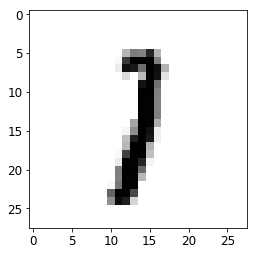

Classifier prediction is [ True] that the image is a 7


In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

index7 = np.where(np.equal(y_test_7,np.logical_not(y_pred_test)))[0]
# randomly pick an image again
pick = index7[np.random.choice(index7.shape[0])]
digit_7 = X_test[pick,:]
# reshape into a matrix
digit_7_image = digit_7.reshape(28, 28)
plt.imshow(digit_7_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
# plt.axis("on")
plt.show()

print('Classifier prediction is {0} that the image is a 7'.format(nn_clf.predict([digit_7])))

Let's calculate precision, recall and the f1 score; easy to crunch numbers ourselves but its built in.

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def print_classifier_scores( y_true, y_res ) :
    print('Precision is {0} '.format(precision_score(y_true, y_res)))
    print('Recall is {0} '.format(recall_score(y_true, y_res)))
    print('F1 is {0} '.format(f1_score(y_true, y_res)))
    print( 'And the confusion matrix: \n {0}'.format(confusion_matrix(y_true, y_res) ))

print('Classifier scores on training set: ')
print_classifier_scores(y_train_7,y_pred)
print('Classifier scores on test set: ')
print_classifier_scores(y_test_7,y_pred_test)


Classifier scores on training set: 
Precision is 0.9991992312620115 
Recall is 0.9980803071508558 
F1 is 0.9986394557823128 
And the confusion matrix: 
 [[53744     5]
 [   12  6239]]
Classifier scores on test set: 
Precision is 0.9616490891658677 
Recall is 0.9625719769673704 
F1 is 0.9621103117505995 
And the confusion matrix: 
 [[8918   40]
 [  39 1003]]


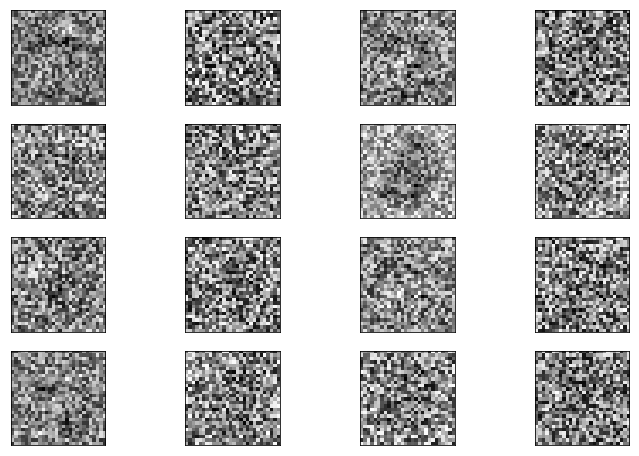

In [14]:
# Snippet from sklearn tutorial to visualize weights

fig, axes = plt.subplots(4, 4,figsize=(12, 8))

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn_clf.coefs_[0].min(), nn_clf.coefs_[0].max()
for coef, ax in zip(nn_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray ) 
    #vmin=.5 * vmin,
    #vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


Iteration 0, loss = 0.24397125814639326
Iteration 1, loss = 0.05643189456340898
Iteration 2, loss = 0.046460833842228925
Iteration 3, loss = 0.040175427632094536
Iteration 4, loss = 0.036524385452777114
Iteration 5, loss = 0.033294207791920195
Iteration 6, loss = 0.030229862877077324
Iteration 7, loss = 0.028460349563548187
Iteration 8, loss = 0.02692531257525357
Iteration 9, loss = 0.025520389805473432
Iteration 10, loss = 0.024582290696867643
Iteration 11, loss = 0.022801541575372664
Iteration 12, loss = 0.021597721209960768
Iteration 13, loss = 0.02021907485026341
Iteration 14, loss = 0.019427930064154685
Iteration 15, loss = 0.01842156529886699
Iteration 16, loss = 0.01782431028943065
Iteration 17, loss = 0.016545064922408304
Iteration 18, loss = 0.016614219345294126
Iteration 19, loss = 0.01500067360894429
Iteration 20, loss = 0.014525957278676805
Iteration 21, loss = 0.013359755614370228
Iteration 22, loss = 0.013267223861819633
Iteration 23, loss = 0.012458420737635572
Iteration

Text(0,0.5,'1-accuracy')

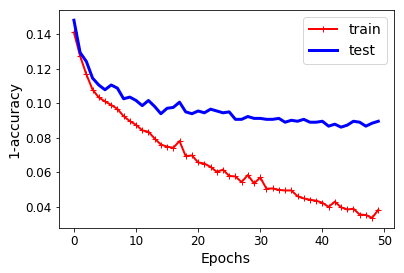

In [15]:
import warnings
nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd',validation_fraction=0.0)

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(X_train, y_train_7)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(y_train_7, nn_clf.predict(X_train)))
    test_errors.append(1-accuracy_score(y_test_7, nn_clf.predict(X_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy", fontsize=14)  
    
    

# Multiclass classification

Same idea than with binary classification but with multiple outputs

In [16]:
from sklearn.neural_network import MLPClassifier

nn_mclf = MLPClassifier(max_iter=100,solver='sgd',verbose='true',validation_fraction=0.0)

nn_mclf.fit(X_train, y_train)

Iteration 1, loss = 2.08488410
Iteration 2, loss = 1.32383398
Iteration 3, loss = 1.10934438
Iteration 4, loss = 1.01041371
Iteration 5, loss = 0.85781848
Iteration 6, loss = 0.80642879
Iteration 7, loss = 0.69703734
Iteration 8, loss = 0.61835459
Iteration 9, loss = 0.57947713
Iteration 10, loss = 0.53580407
Iteration 11, loss = 0.47647871
Iteration 12, loss = 0.43400306
Iteration 13, loss = 0.40743880
Iteration 14, loss = 0.39122538
Iteration 15, loss = 0.37624137
Iteration 16, loss = 0.36737483
Iteration 17, loss = 0.35801810
Iteration 18, loss = 0.34819688
Iteration 19, loss = 0.33825767
Iteration 20, loss = 0.33074513
Iteration 21, loss = 0.32638453
Iteration 22, loss = 0.31826044
Iteration 23, loss = 0.31321156
Iteration 24, loss = 0.30936142
Iteration 25, loss = 0.30267373
Iteration 26, loss = 0.30088625
Iteration 27, loss = 0.29683441
Iteration 28, loss = 0.29552132
Iteration 29, loss = 0.29024620
Iteration 30, loss = 0.28780403
Iteration 31, loss = 0.28103592
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.0,
       verbose='true', warm_start=False)

In [17]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (784, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


In [18]:
print('Classifier prediction is that the image belongs to class {0}'.format(nn_mclf.predict([digit_7])))

Classifier prediction is that the image belongs to class [1.]


In [19]:
y_train_pred = nn_mclf.predict(X_train)
y_test_pred = nn_mclf.predict(X_test)
conf_mx_train  = confusion_matrix(y_train, y_train_pred)
conf_mx_test  = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix (training): \n{0}'.format(conf_mx_train))
print('Confusion matrix (test): \n{0}'.format(conf_mx_test))

Confusion matrix (training): 
[[5708    0   26    0   13   12   23   24   61    7]
 [   1 6565   23   23    8   35    1    7   46    8]
 [  53   20 5596   26   37   26   19   68  173    8]
 [   0    1  192 5516    3   94    6   85  160   31]
 [  16    3    9    1 5705    2   10    6   23   78]
 [  13   14   13  116   13 5009   65    9  133   18]
 [  37   14    3    1   21   58 5681    0   85    0]
 [  10    4   56    8   37   16    0 5929   26  165]
 [  10   10   28   42   32   80   17   17 5621   42]
 [  10    6    0  117  283   26    1  113   58 5375]]
Confusion matrix (test): 
[[ 989    0    7    0    2    6    3    5   17    0]
 [   0 1122    3    1    2    5    1    5   19    2]
 [   3    4  889    4    7    4    2   10   40    1]
 [   3    4   39  911    2   29    1   16   44    4]
 [   3    5    2    1  923    2    2    2   10   21]
 [   6    0    3   21    5  818   16    3   27   11]
 [   7    3    3    0    8   12  928    0   15    0]
 [   2    3   13    2    8    5    0  975 

In [20]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Make errors more visible by printing the ratio and zeroing out the diagonal.

Saving figure confusion_matrix_errors_plot


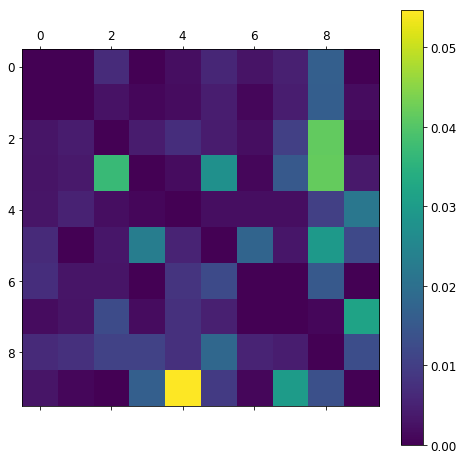

In [21]:
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_test / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()